In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier


In [11]:
df_scaled = pd.read_csv("scaled_data.csv")
df_encoded = pd.read_csv("encoded_data.csv")

In [12]:
from imblearn.combine import SMOTEENN
X = df_scaled.drop("Exited", axis=1)
y = df_scaled["Exited"]
smote_enn = SMOTEENN(random_state = 42)
X_resampled, y_resampled = smote_enn.fit_resample(X,y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

Accuracy: 0.9622800096058184
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     25939
           1       0.97      0.96      0.97     32359

    accuracy                           0.96     58298
   macro avg       0.96      0.96      0.96     58298
weighted avg       0.96      0.96      0.96     58298



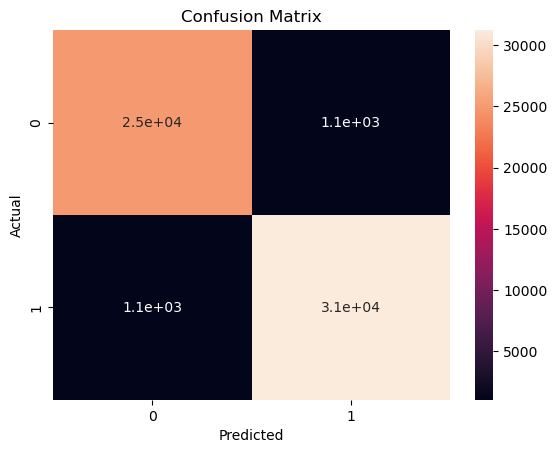

In [14]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

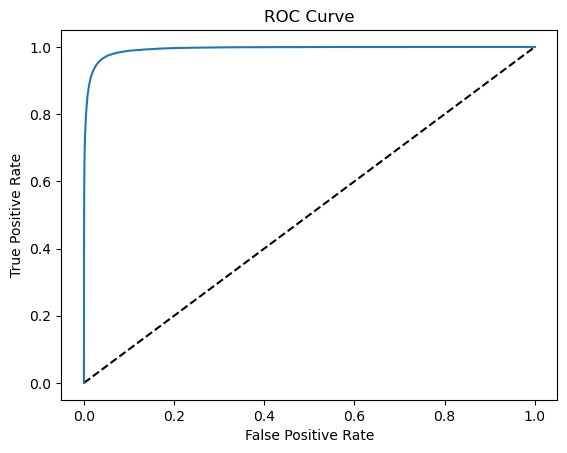

 AUC Score: 0.9933734656991993


In [15]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1])

plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print (f" AUC Score: {roc_auc_score(y_test,y_pred_proba[:,1])}")

In [16]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

C:\Users\eslam\AppData\Local\Temp\ipykernel_3732\335377848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


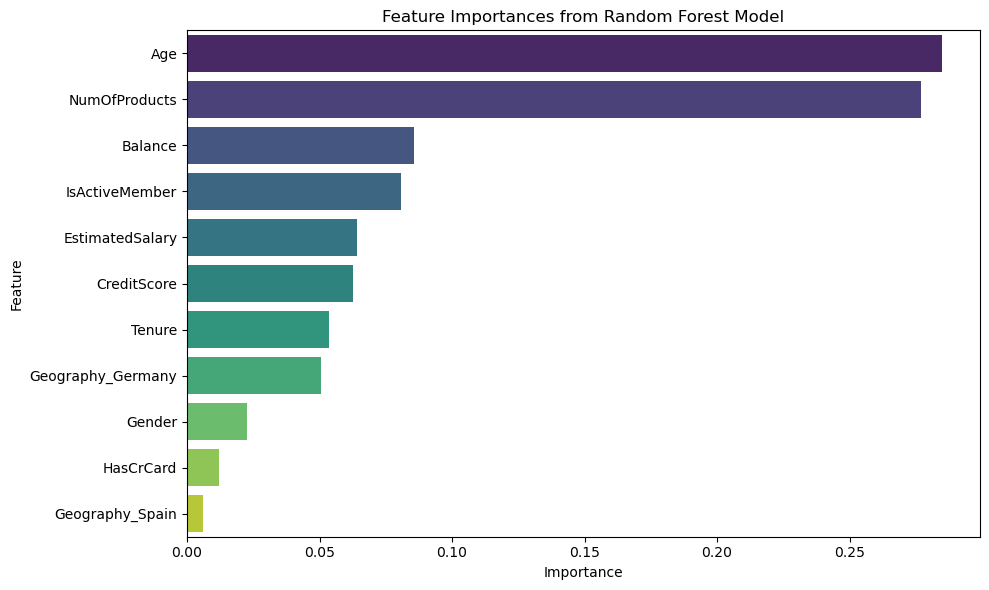

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')

plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [18]:
import pickle

filename = "rf_model.sav"
pickle.dump(rf_model, open(filename, "wb"))

In [21]:
from sklearn.preprocessing import StandardScaler

df = df_encoded[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pickle.dump(scaler, open("scaler.sav", "wb"))